In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

# 데이터프레임 구축

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
# iris_df 생성 방법 1
iris_df = pd.DataFrame({'sl':iris['data'][:,0], 'sw':iris['data'][:,1], 'pl':iris['data'][:,2], 'pw':iris['data'][:,3], 'species':iris['target']})
iris_df['species'] = iris_df['species'].astype('category')
iris_df, iris_df.dtypes
# iris_df
# iris_df.dtypes

(      sl   sw   pl   pw species
 0    5.1  3.5  1.4  0.2       0
 1    4.9  3.0  1.4  0.2       0
 2    4.7  3.2  1.3  0.2       0
 3    4.6  3.1  1.5  0.2       0
 4    5.0  3.6  1.4  0.2       0
 ..   ...  ...  ...  ...     ...
 145  6.7  3.0  5.2  2.3       2
 146  6.3  2.5  5.0  1.9       2
 147  6.5  3.0  5.2  2.0       2
 148  6.2  3.4  5.4  2.3       2
 149  5.9  3.0  5.1  1.8       2
 
 [150 rows x 5 columns],
 sl          float64
 sw          float64
 pl          float64
 pw          float64
 species    category
 dtype: object)

In [8]:
# iris_df 생성 방법 2
iris_df = pd.merge(pd.DataFrame(iris['data']), pd.DataFrame(iris['target']).astype('category'), right_index=True, left_index=True)
iris_df.columns = ['sl', 'sw', 'pl', 'pw', 'species']
iris_df, iris_df.dtypes

(      sl   sw   pl   pw species
 0    5.1  3.5  1.4  0.2       0
 1    4.9  3.0  1.4  0.2       0
 2    4.7  3.2  1.3  0.2       0
 3    4.6  3.1  1.5  0.2       0
 4    5.0  3.6  1.4  0.2       0
 ..   ...  ...  ...  ...     ...
 145  6.7  3.0  5.2  2.3       2
 146  6.3  2.5  5.0  1.9       2
 147  6.5  3.0  5.2  2.0       2
 148  6.2  3.4  5.4  2.3       2
 149  5.9  3.0  5.1  1.8       2
 
 [150 rows x 5 columns],
 sl          float64
 sw          float64
 pl          float64
 pw          float64
 species    category
 dtype: object)

In [9]:
# iris_df 생성 방법 3
iris_df = pd.concat([pd.DataFrame(iris['data']), pd.DataFrame(iris['target']).astype('category')], axis=1)
iris_df.columns = ['sl', 'sw', 'pl', 'pw', 'species']
iris_df, iris_df.dtypes

(      sl   sw   pl   pw species
 0    5.1  3.5  1.4  0.2       0
 1    4.9  3.0  1.4  0.2       0
 2    4.7  3.2  1.3  0.2       0
 3    4.6  3.1  1.5  0.2       0
 4    5.0  3.6  1.4  0.2       0
 ..   ...  ...  ...  ...     ...
 145  6.7  3.0  5.2  2.3       2
 146  6.3  2.5  5.0  1.9       2
 147  6.5  3.0  5.2  2.0       2
 148  6.2  3.4  5.4  2.3       2
 149  5.9  3.0  5.1  1.8       2
 
 [150 rows x 5 columns],
 sl          float64
 sw          float64
 pl          float64
 pw          float64
 species    category
 dtype: object)

## 데이터프레임과 array 연습

In [11]:
iris_x_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_x_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
iris_x_array = iris_x_df.to_numpy()
iris_x_array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
iris_target_df = pd.DataFrame(iris['target'])
iris_target_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [19]:
iris_target_array = iris_target_df.to_numpy
iris_target_array

<bound method DataFrame.to_numpy of      0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]>

In [20]:
type(iris_df)

pandas.core.frame.DataFrame

In [42]:
type(iris_target_df)

pandas.core.frame.DataFrame

In [21]:
type(iris_target_array)

method

In [22]:
iris_x_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [23]:
iris_x_df.columns = ['sl', 'sw', 'pl', 'pw']
iris_x_df

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 기술통계량을 통해서 데이터 요약

In [12]:
iris_df.mean(numeric_only=True)

sl    5.843333
sw    3.057333
pl    3.758000
pw    1.199333
dtype: float64

In [13]:
iris_df.median(numeric_only=True)

sl    5.80
sw    3.00
pl    4.35
pw    1.30
dtype: float64

In [14]:
iris_df.var(numeric_only=True)

sl    0.685694
sw    0.189979
pl    3.116278
pw    0.581006
dtype: float64

# 데이터 시각화로 데이터 요약하기

In [40]:
iris_target_df.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

In [41]:
iris_target_df.index

RangeIndex(start=0, stop=150, step=1)

In [63]:
vc = iris_target_df.value_counts()

In [64]:
vc.index

MultiIndex([(0,),
            (1,),
            (2,)],
           names=[0])

In [65]:
indices = vc.index.get_level_values(0).to_list()

<Axes: ylabel='count'>

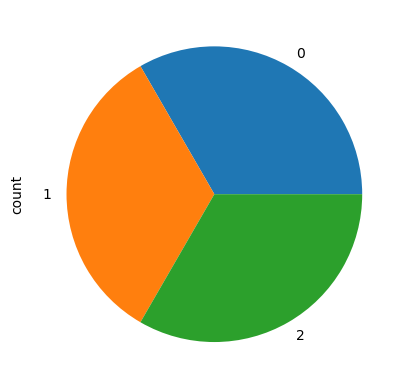

In [66]:
iris_target_df.value_counts().plot(kind='pie', labels=indices)

<Axes: xlabel='0'>

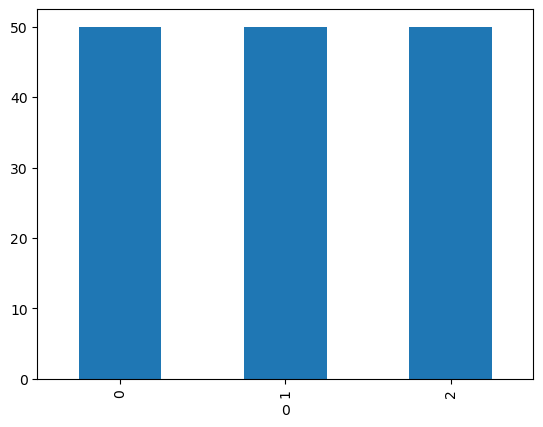

In [67]:
iris_target_df.value_counts().plot(kind='bar', xticks=indices)

<Axes: ylabel='Frequency'>

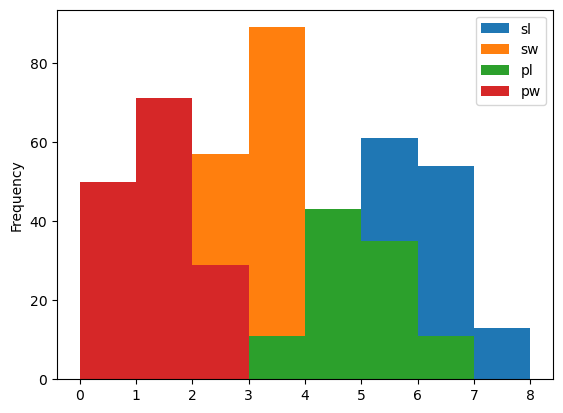

In [26]:
iris_df.plot(kind='hist', bins=range(0,9))

Text(0.5, 1.0, 'pl')

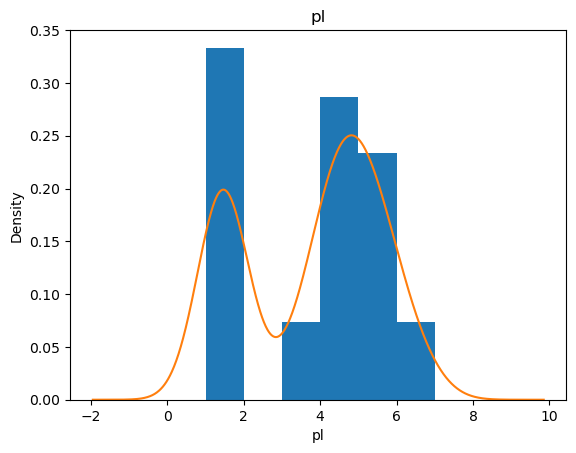

In [27]:
aa = iris_df['pl'].plot(kind='hist', density=True, bins=range(0,9))
iris_df['pl'].plot(kind='density', ax=aa)
aa.set_xlabel('pl')
aa.set_title('pl')

Text(0.5, 1.0, 'pw')

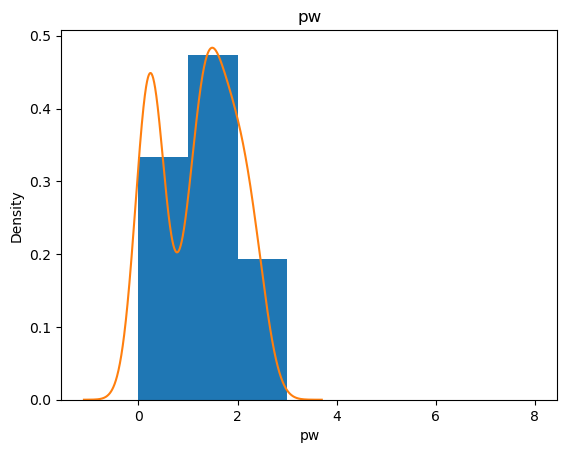

In [28]:
aa = iris_df['pw'].plot(kind='hist', density=True, bins=range(0,9))
iris_df['pw'].plot(kind='density', ax=aa)
aa.set_xlabel('pw')
aa.set_title('pw')

Text(0.5, 1.0, 'sl')

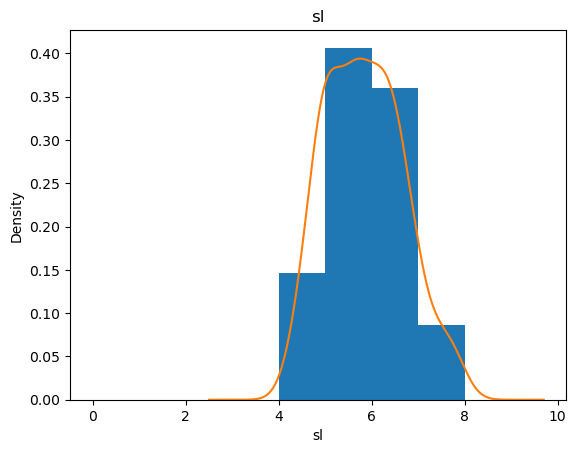

In [29]:
aa = iris_df['sl'].plot(kind='hist', density=True, bins=range(0,9))
iris_df['sl'].plot(kind='density', ax=aa)
aa.set_xlabel('sl')
aa.set_title('sl')

Text(0.5, 1.0, 'sw')

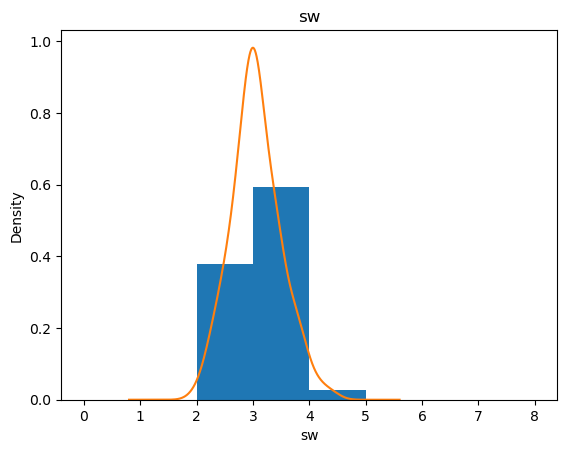

In [30]:
aa = iris_df['sw'].plot(kind='hist', density=True, bins=range(0,9))
iris_df['sw'].plot(kind='density', ax=aa)
aa.set_xlabel('sw')
aa.set_title('sw')

<Axes: >

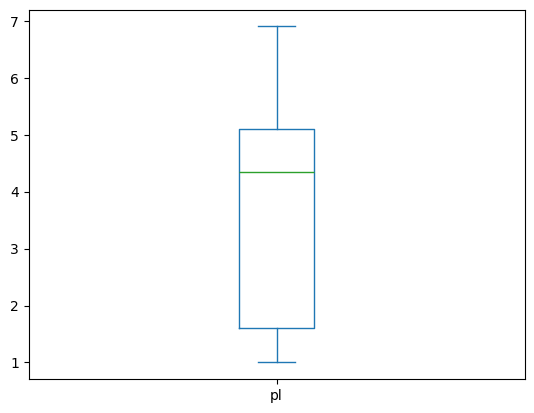

In [33]:
iris_df['pl'].plot(kind='box')

<Axes: xlabel='pl', ylabel='pw'>

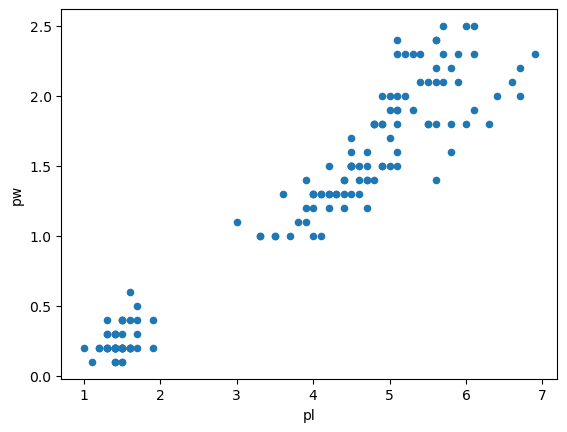

In [34]:
iris_df.plot(kind='scatter', x='pl', y='pw')

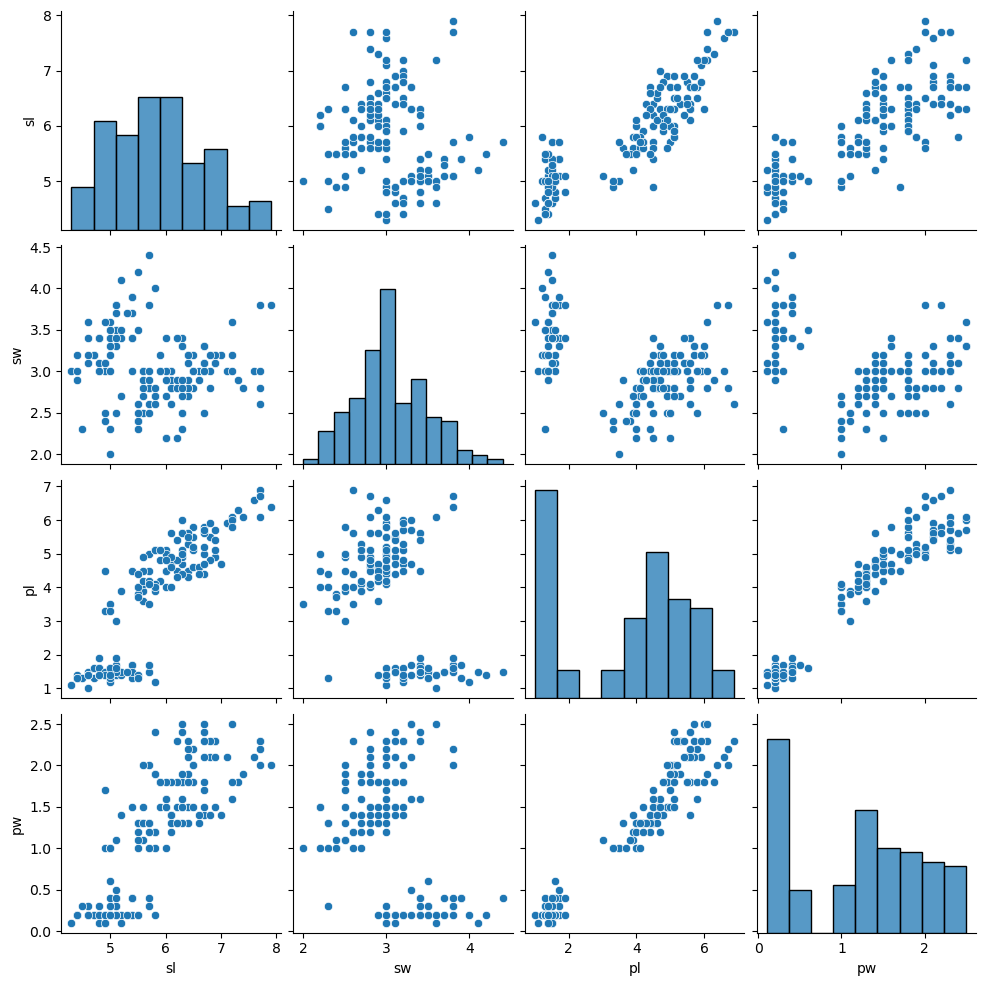

In [35]:
sns.pairplot(iris_df)

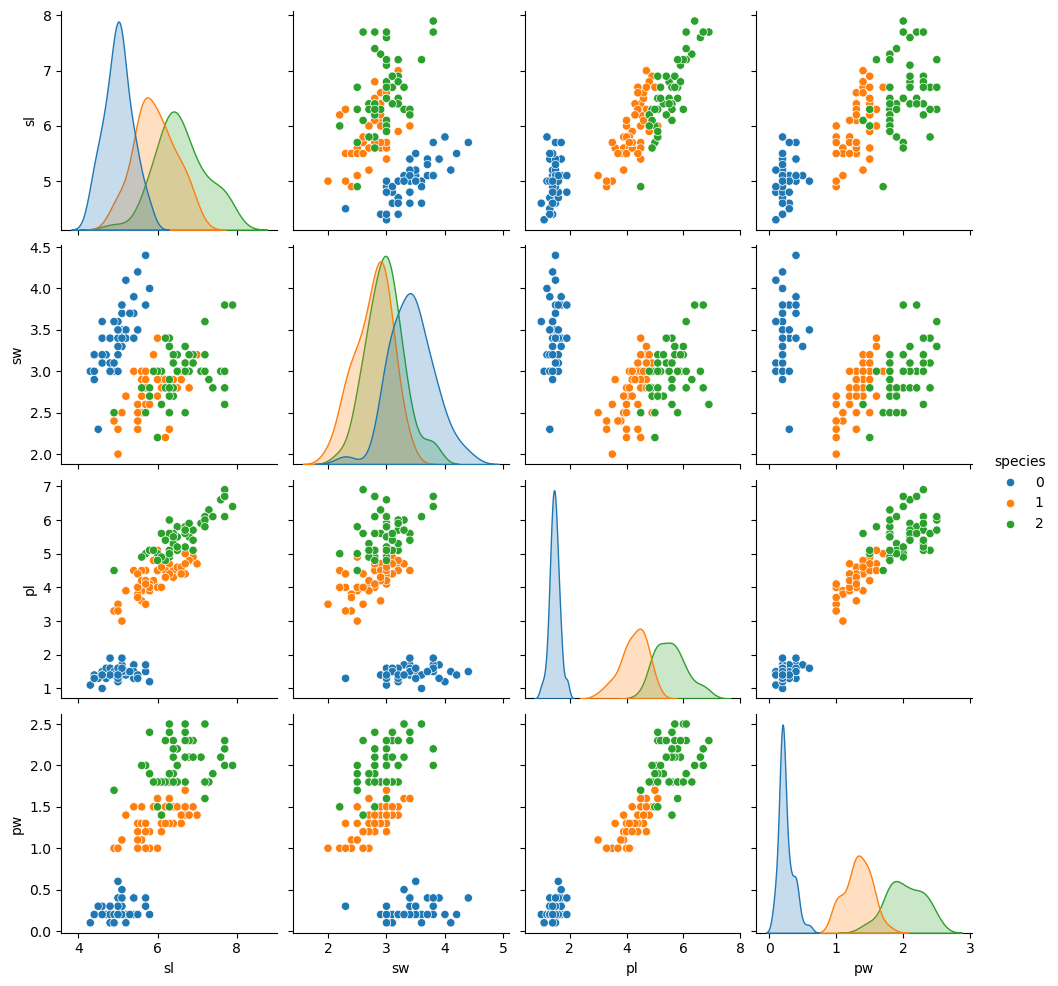

In [36]:
sns.pairplot(iris_df, hue='species')

# 상관관계

In [37]:
iris_df.corr(numeric_only=True)

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


<Axes: >

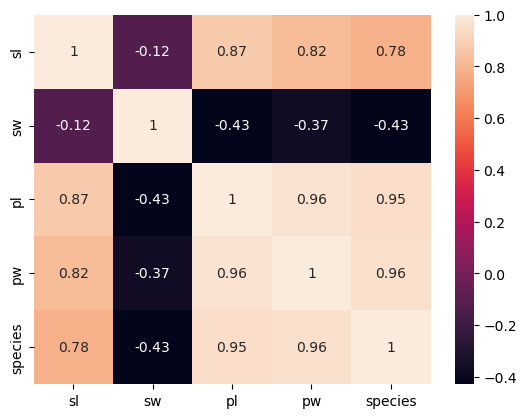

In [38]:
sns.heatmap(iris_df.corr(), annot=True)

In [39]:
iris_df['pl'].corr(iris_df['pw'])

0.9628654314027963